## Atomic Potential calculation  - Hatree Fock - Kirkland Book - p263

In [156]:
import sys
!{sys.executable} -m pip install periodictable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for periodictable: filename=periodictable-1.7.0-py3-none-any.whl size=752513 sha256=e8d298ef05d22dc526ab62213a1c6061f9cef47cfa47d4154f162bea3382d41a
  Stored in directory: /home/massmeye/.cache/pip/wheels/e9/80/00/228371b6ac2df77f523257d0e3330def502451ff9cd967cf42
Successfully built periodictable


In [163]:
# import abtem
# import ase.io
import matplotlib.pyplot as plt
import numpy as np
import scipy
import periodictable
# from ase.io import read
# from ase.build import surface
# from abtem.atoms import pretty_print_transform
# import py4DSTEM
# from py4DSTEM import show
# import os

In [164]:
periodictable.S.number

16

In [165]:
##read parameters from txt file
#ordered like this:
#Z= 6, chisq= 0.143335
# a1 b1 a2 b2
# a3 b3 c1 d1
# c2 d2 c3 d3
#units a: A^-1; b: A^-2; c: A, d: A^2

Z = pt.S.number
p = np.loadtxt("/masc_shared/ag_volz/Oliver_Maßmeyer/MS_Ptycho/Parameter_Atomic_Potentials.txt", dtype='float', delimiter=' ',skiprows = 1+4*(Z-1), max_rows=3)


In [150]:
print(p)

[[4.20298324e-03 2.25350888e-01 6.27762505e-02 2.25366950e-01]
 [3.00907347e-02 2.25331756e-01 6.77756695e-02 4.38854001e+00]
 [3.56609237e-03 4.03884823e-01 2.76135815e-02 1.44490166e+00]]


In [21]:
print(p[1][0], p[0][1], p[0][2])

0.168254385 0.208605417 0.199811865


In [9]:
p[0][1]**(1/2)

0.4567334200603236

In [52]:
epsi_0

8.8541878128e-12

(0.0, 0.5)

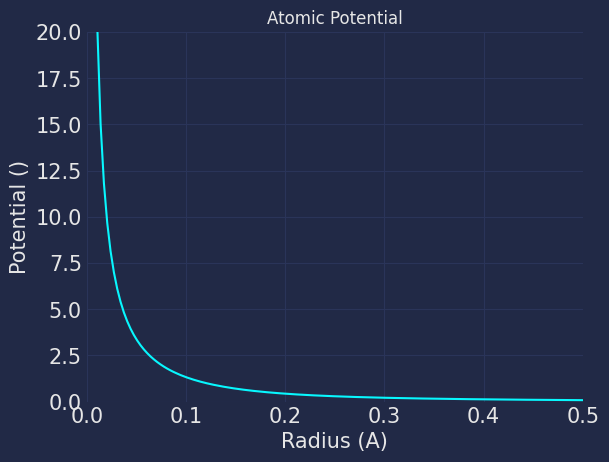

In [166]:
#  Calculate potential vs radius

radius_values = np.linspace(0.0005,0.5,num=150) #in Angstrom
bohr_radius = scipy.constants.physical_constants["Bohr radius"]
a_0 = bohr_radius[0]*1e10 #in Angstrom
e = scipy.constants.e
e = 14.4
pi = scipy.constants.pi
r = radius_values #distance to atom core
epsi_0 = scipy.constants.epsilon_0
# r = 0.1
f_1 = 2*pi**2*a_0*e
s_1 = p[0][0]/r*np.exp(-2*pi*r*p[0][1]**(1/2))
s_2 = p[0][2]/r*np.exp(-2*pi*r*p[0][3]**(1/2))
s_3 = p[1][0]/r*np.exp(-2*pi*r*p[1][1]**(1/2))
f_2 = 2*pi**(5/2)*a_0*e
s_4 = p[1][2]*p[1][3]**(-3/2)*np.exp(-pi**2*r**2/p[1][3])
s_5 = p[2][0]*p[2][1]**(-3/2)*np.exp(-pi**2*r**2/p[2][1])
s_6 = p[2][2]*p[2][3]**(-3/2)*np.exp(-pi**2*r**2/p[2][3])

V = f_1*(s_1+s_2+s_3)+f_2*(s_4+s_5+s_6)
# V
# V_scaled = V/(epsi_0*4*pi)**2/1000
# nice plot with cyberpunk
import mplcyberpunk
import matplotlib 
plt.style.use('cyberpunk')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 


plt.plot(radius_values,V/1000)
plt.title('Atomic Potential')
plt.ylabel('Potential ()',fontsize=15)
plt.xlabel('Radius (A)',fontsize=15)
plt.ylim((0,20))
plt.xlim((0,0.5))
# mplcyberpunk.add_gradient_fill(alpha_gradientglow=0)


In [14]:
K_0 = scipy.special.ive(0,0.05)

In [129]:
p


array([[1.06543892e+00, 1.04118455e+00, 1.20143691e-01, 6.87113368e+01],
       [1.80915263e-01, 8.87533926e-02, 1.12065620e+00, 3.70062619e+00],
       [3.05452816e-02, 2.14097897e-01, 1.59963502e+00, 9.99096638e+00]])

(0.0, 0.5)

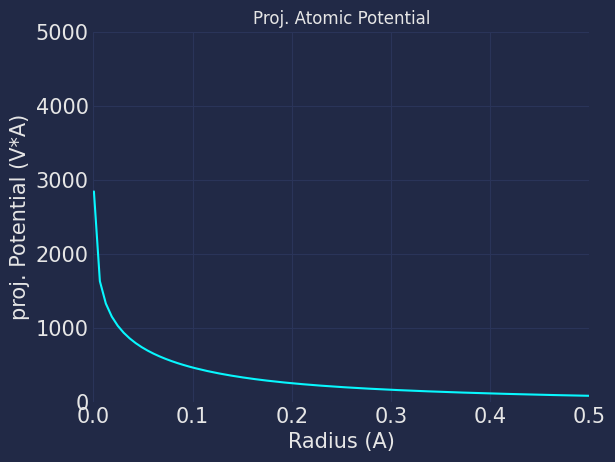

In [174]:
# Projected Potential
number_of_steps = 500
radius_values = np.linspace(0.0005,3,num=number_of_steps) #in Angstrom
bohr_radius = scipy.constants.physical_constants["Bohr radius"]
a_0 = bohr_radius[0]*1e10#in Angstrom
e = scipy.constants.e
e = 14.4
pi = scipy.constants.pi
r = radius_values #distance to atom core
# epsi_0 = scipy.constants.epsilon_0
# r = 0.1
# K_0 = scipy.special.iv(0,0) # modified bessel function of zeroth oder

f_1 = 4*pi**2*a_0*e
s_1 = p[0][0]*scipy.special.kv(0,2*pi*r*p[0][1]**(1/2))
s_2 = p[0][2]*scipy.special.kv(0,2*pi*r*p[0][3]**(1/2))
s_3 = p[1][0]*scipy.special.kv(0,2*pi*r*p[1][1]**(1/2))
f_2 = 2*pi**2*a_0*e
s_4 = p[1][2]/p[1][3]*np.exp(-pi**2*r**2/p[1][3])
s_5 = p[2][0]/p[2][1]*np.exp(-pi**2*r**2/p[2][1])
s_6 = p[2][2]/p[2][3]*np.exp(-pi**2*r**2/p[2][3])



V_proj = f_1*(s_1+s_2+s_3)+f_2*(s_4+s_5+s_6)
V_proj/1000

# # nice plot with cyberpunk
import mplcyberpunk
import matplotlib 
plt.style.use('cyberpunk')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 


plt.plot(radius_values,V_proj)
plt.title('Proj. Atomic Potential')
plt.ylabel('proj. Potential (V*A)',fontsize=15)
plt.xlabel('Radius (A)',fontsize=15)
plt.ylim((0,5000))
plt.xlim((0,0.5))
# plt.xticks(np.arange(min(radius_values), max(radius_values)+1, 1.0))

(0.0, 3.0)

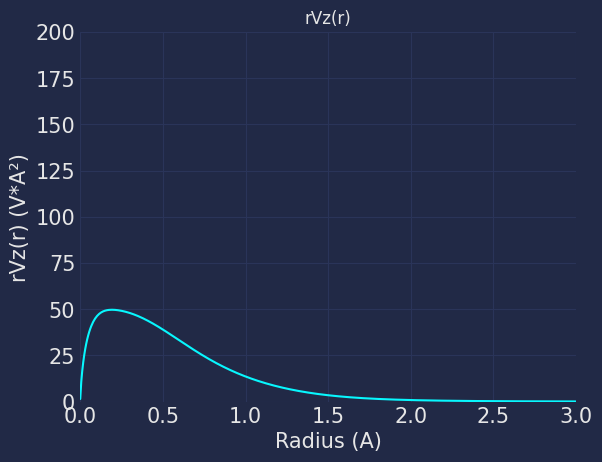

In [175]:
### Projected Potential multiplied by radius r to illustrate the relatie contribution to an image

plt.plot(radius_values,V_proj*r)
plt.title('rVz(r)')
plt.ylabel('rVz(r) (V*A²)',fontsize=15)
plt.xlabel('Radius (A)',fontsize=15)
plt.ylim((0,200))
plt.xlim((0,3))

In [180]:
radius_values.shape

(500,)

In [177]:
## integrate the values
potential_value = sum(V_proj*r)
potential_value

13.103457359897755

In [34]:
print(a_0,e,pi,r)

0.529177210903 1.602176634e-19 3.141592653589793 [0.05       0.05918367 0.06836735 0.07755102 0.08673469 0.09591837
 0.10510204 0.11428571 0.12346939 0.13265306 0.14183673 0.15102041
 0.16020408 0.16938776 0.17857143 0.1877551  0.19693878 0.20612245
 0.21530612 0.2244898  0.23367347 0.24285714 0.25204082 0.26122449
 0.27040816 0.27959184 0.28877551 0.29795918 0.30714286 0.31632653
 0.3255102  0.33469388 0.34387755 0.35306122 0.3622449  0.37142857
 0.38061224 0.38979592 0.39897959 0.40816327 0.41734694 0.42653061
 0.43571429 0.44489796 0.45408163 0.46326531 0.47244898 0.48163265
 0.49081633 0.5       ]
